In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Datasets/Level 2 Online Retail/onlineRetailFeatureEngineered.csv')
custRfmDf = pd.read_csv('/content/drive/MyDrive/Datasets/Level 2 Online Retail/customersRfm.csv')
monthlyRevenueDf = pd.read_csv('/content/drive/MyDrive/Datasets/Level 2 Online Retail/monthlyRevenue.csv')
productFeatures = pd.read_csv('/content/drive/MyDrive/Datasets/Level 2 Online Retail/productFeatures.csv')

### Transaction-Level Dataset

In [2]:
# quantitative analysis
df.describe(include=['float', 'int'])

,Invoice,Quantity,Price,Customer ID,TotalPrice,Year,Month,Week,Day Of Week
count,407664.000000,407664.000000,407664.000000,407664.000000,407664.000000,407664.00000,407664.000000,407664.000000,407664.000000
mean,514761.109151,13.585585,3.294438,15368.592598,21.664909,2009.92456,7.404600,30.024081,2.689666
std,14100.789885,96.840747,34.757965,1679.762138,77.150058,0.26410,3.472715,15.045607,1.978086
min,489434.000000,1.000000,0.001000,12346.000000,0.001000,2009.00000,1.000000,1.000000,0.000000
25%,502764.000000,2.000000,1.250000,13997.000000,4.950000,2010.00000,4.000000,17.000000,1.000000
50%,515304.000000,5.000000,1.950000,15321.000000,11.900000,2010.00000,8.000000,32.000000,3.000000
75%,527104.000000,12.000000,3.750000,16812.000000,19.500000,2010.00000,11.000000,44.000000,4.000000
max,538171.000000,19152.000000,10953.500000,18287.000000,15818.400000,2010.00000,12.000000,52.000000,6.000000


<BarContainer object of 10 artists>

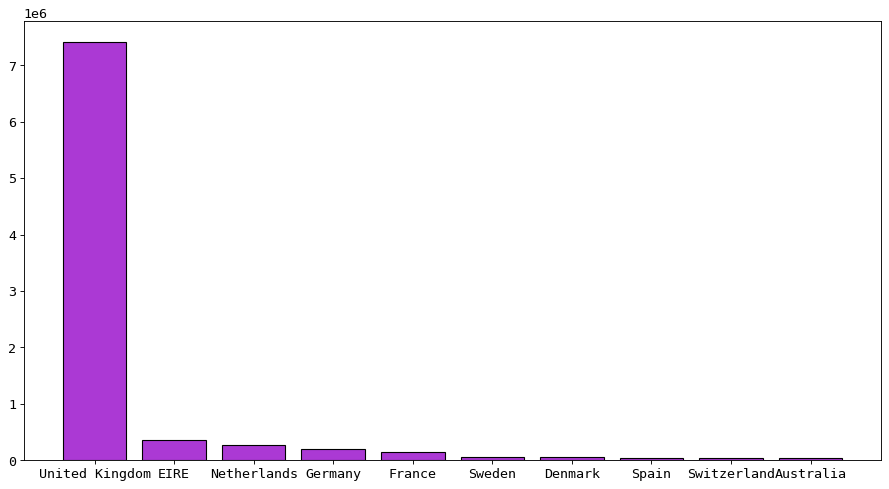

In [3]:
# setting plot parameters
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

# top countries by total sales
topCountries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(11, 6), dpi=80, layout='constrained')
plt.bar(topCountries.index, topCountries.values, ec="black", color="#AB39D4")

Text(0.5, 1.0, 'Top Customers By Spending')

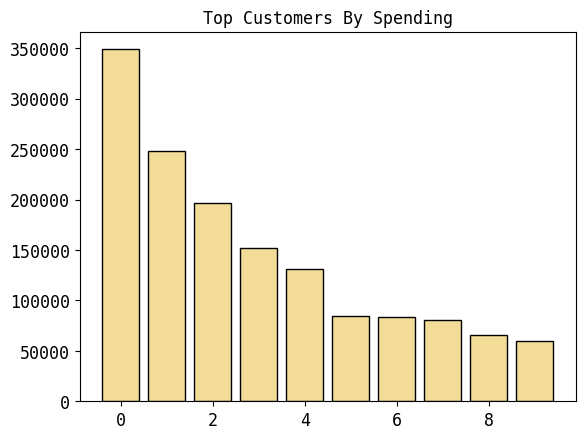

In [4]:
# top customers by spending
topCustomers = df.groupby('Customer ID')['TotalPrice'].sum().sort_values(ascending=False).reset_index()

plt.bar(np.arange(0, len(topCustomers.iloc[:10, :].index)), topCustomers.iloc[:10, 1].values,
        ec="black", color="#F2DC97")
plt.title("Top Customers By Spending")

In [5]:
# average basket size (revenue per invoice)
basketSize = df.groupby('Invoice').TotalPrice.sum()
basketSize.describe()

,TotalPrice
count,19213.000000
mean,459.688923
std,931.129071
min,0.840000
25%,159.380000
50%,303.540000
75%,484.440000
max,44051.600000


### Customer-Level Dataset (rfm)

array([[<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Frequency'}>],
       [<Axes: title={'center': 'Monetary'}>, <Axes: >]], dtype=object)

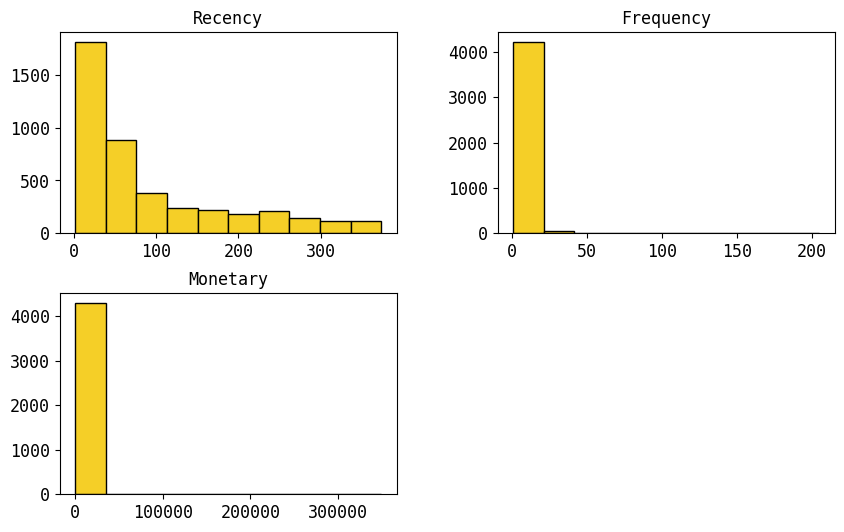

In [13]:
# Distribution of Recency, Frequency, Monetary
custRfmDf[['Recency', 'Frequency', 'Monetary']].hist(
    color="#F5CF27", grid=False, edgecolor="black", figsize=(10, 6),
)

In [15]:
# Correlation between Recency, Frequency and Monetary
custRfmDf.corr(method="pearson") # no real correlation excpt for Frequency and Monetary

,Customer ID,Recency,Frequency,Monetary
Customer ID,1.000000,0.001896,-0.003574,-0.010176
Recency,0.001896,1.000000,-0.248784,-0.121112
Frequency,-0.003574,-0.248784,1.000000,0.656264
Monetary,-0.010176,-0.121112,0.656264,1.000000


In [22]:
# RFM segments
custRfmDf['R_Quartile'] = pd.qcut(custRfmDf['Recency'], 4, labels=[4, 3, 2, 1]) # lower recency = better
custRfmDf['F_Quartile'] = pd.qcut(custRfmDf['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
custRfmDf['M_Quartile'] = pd.qcut(custRfmDf['Monetary'], 4, labels=[1, 2, 3, 4])

custRfmDf['RFM_Score'] = (
    custRfmDf['R_Quartile'].astype(int) +
    custRfmDf['F_Quartile'].astype(int) +
    custRfmDf['M_Quartile'].astype(int)
)

def segmentCustomer(score: int) -> str:
  if score >= 10:
    return "Champions"
  elif score >= 8:
    return "Loyal"
  elif score >= 6:
    return "Potential Loyalist"
  elif score >= 4:
    return "At Risk"
  else:
    return "Hybernating"

custRfmDf['Segment'] = custRfmDf['RFM_Score'].apply(segmentCustomer)
custRfmDf

,Customer ID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score,Segment
0,12346.0,165,11,372.86,1,4,2,7,Potential Loyalist
1,12347.0,3,2,1323.32,4,2,3,9,Loyal
2,12348.0,74,1,222.16,2,1,1,4,At Risk
3,12349.0,43,3,2671.14,3,3,4,10,Champions
4,12351.0,11,1,300.93,4,1,1,6,Potential Loyalist
...,...,...,...,...,...,...,...,...,...
4307,18283.0,18,6,641.77,4,4,2,10,Champions
4308,18284.0,67,1,461.68,2,2,2,6,Potential Loyalist
4309,18285.0,296,1,427.00,1,2,2,5,At Risk
4310,18286.0,112,2,1296.43,2,3,3,8,Loyal


### Product-Level Dataset

Text(0.5, 1.0, 'Total Quantity Sold')

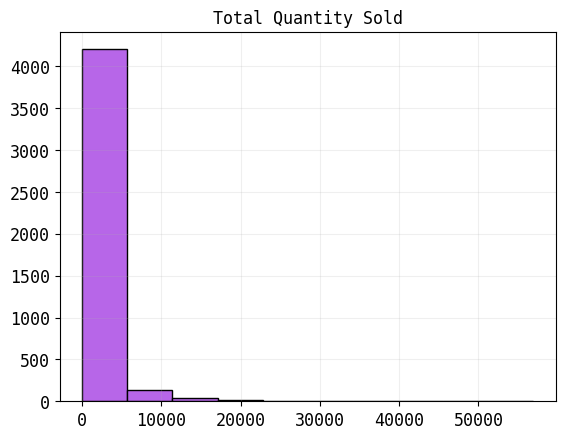

In [29]:
# Total quantity sold per product
plt.hist(productFeatures['Total Quantity Sold'], color="#B766E8", edgecolor="black")
plt.grid(alpha=0.2)
plt.title("Total Quantity Sold")

In [32]:
# average revenue per invoice
productFeatures['Revenue Per Invoice'] = productFeatures['Total Revenue'] / productFeatures['Unique Invoices']
productFeatures['Revenue Per Invoice'] = productFeatures['Revenue Per Invoice'].round(2)

productFeatures

,Description,Total Quantity Sold,Unique Invoices,Total Revenue,Revenue Per Invoice
0,10 COLOUR SPACEBOY PEN,6017,247,5002.13,20.25
1,11 PC CERAMIC TEA SET POLKADOT,3,1,14.85,14.85
2,12 ASS ZINC CHRISTMAS DECORATIONS,441,45,926.10,20.58
3,12 COLOURED PARTY BALLOONS,2117,121,1310.05,10.83
4,12 DAISY PEGS IN WOOD BOX,582,117,960.30,8.21
...,...,...,...,...,...
4401,ZINC HEART LATTICE TRAY OVAL,325,20,364.15,18.21
4402,ZINC METAL HEART DECORATION,13958,790,16706.50,21.15
4403,ZINC POLICE BOX LANTERN,193,4,783.70,195.92
4404,ZINC TOP 2 DOOR WOODEN SHELF,234,40,1342.30,33.56


Text(0.5, 1.0, 'Most And Less Bought Products')

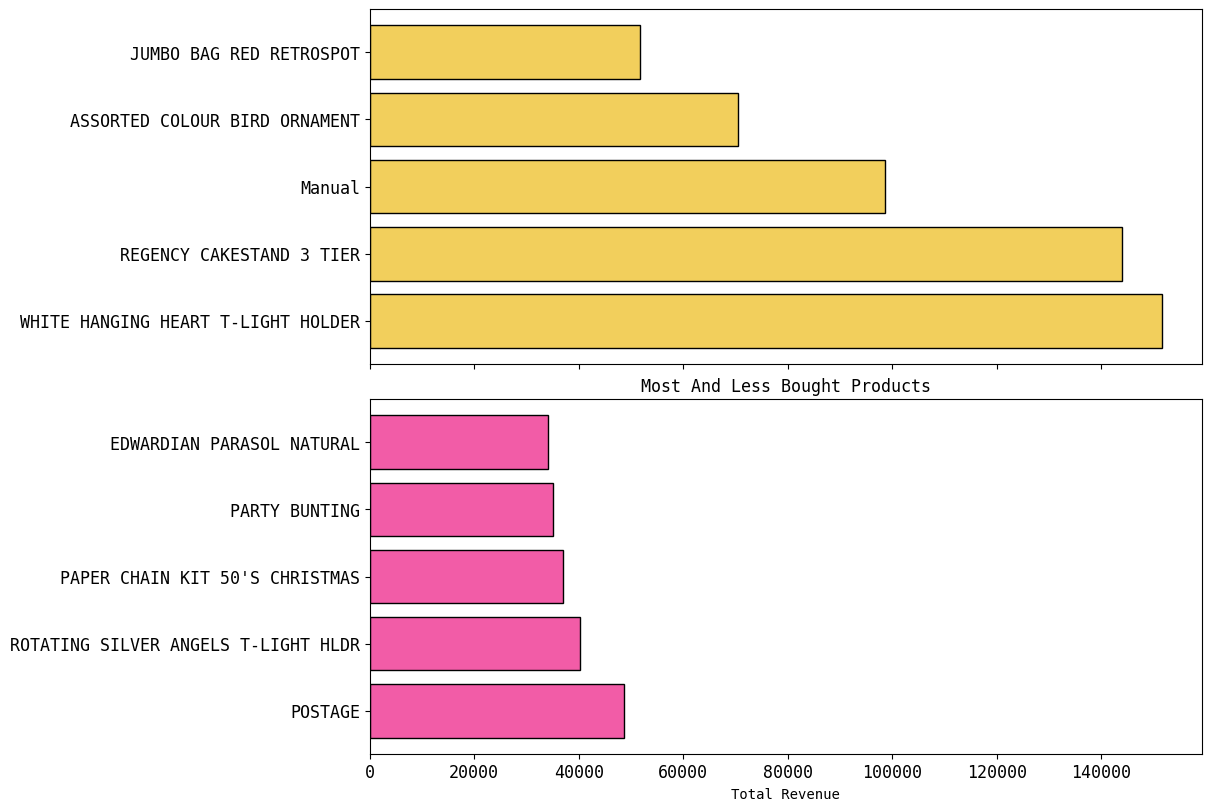

In [45]:
# top and bottom 10 best-selling products
top10BestSellingProducts = productFeatures.sort_values("Total Revenue", ascending=False).head(10)
bottom10BestSellingProducts = productFeatures.sort_values("Total Revenue", ascending=False).tail(10)

fig, axes = plt.subplots(nrows=2, ncols=1, layout="constrained", figsize=(12, 8), sharex=True)

axes[0].barh(top10BestSellingProducts.iloc[0:5, 0].values, top10BestSellingProducts.iloc[0:5, 3].values,
             ec='black', color='#F2CF5C')
axes[1].barh(top10BestSellingProducts.iloc[5:, 0].values, top10BestSellingProducts.iloc[5:, 3].values,
             ec='black', color='#F25CA7')
axes[1].set_xlabel("Total Revenue")
plt.title("Most And Less Bought Products")

### Time-level Dataset

In [47]:
# Total revenue per month
totalRevenuePerMonth = monthlyRevenueDf.groupby('Month')['Total Revenue'].sum()
totalRevenuePerMonth

,Total Revenue
Month,
1,557319.062
2,506371.066
3,699608.991
4,594609.192
5,599985.790
6,639066.580
7,591636.740
8,604242.650
9,831615.001


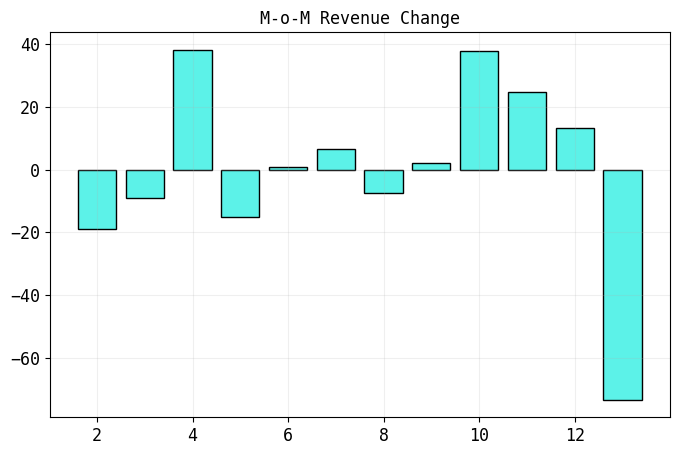

In [53]:
# month-over-month growth
monthlyRevenueDf['M-o-M Revenue Change %'] = monthlyRevenueDf['Total Revenue'].pct_change() * 100

plt.figure(figsize=(8, 5))
plt.bar(np.arange(1, len(monthlyRevenueDf.index) + 1),
        monthlyRevenueDf['M-o-M Revenue Change %'], ec="black", color="#5CF2E8")
plt.title("M-o-M Revenue Change")
plt.grid(alpha=0.2)

# Conclusions

-United Kingdom is the top-spending country, followed by EIRE (Ireland) and the Netherlands.

-The average basket size is £459.70, indicating moderately high-value transactions.

-Most customers made purchases within the last 100 days and over 4,000 customers bought around 25 items on average.

-Frequency and Monetary show a strong positive correlation — more frequent buyers tend to spend more.

-The most purchased product is “White Hanging Heart T-Light Holder”, while the least purchased is “Edwardian Parasol Natural.”

-November recorded the highest revenue, suggesting a seasonal peak (likely holiday-related).